# **EDA of Car-Ads**

Let us try to learn about the Car-Ads dataset. For this, we will import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(13,10)

## **Loading Data**

In [2]:
data = pd.read_csv('personal-cars-classifieds/car_ads.csv')

## **Variable identification**

In [3]:
print('', data.columns)
print('', data.shape)

 Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')
 (3552912, 16)


Let us see some data in the dataset. We will also try to learn about data using describe and info methods.

In [4]:
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [6]:
data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


## **Missing Data Handling**

Next, we will drop the columns with more than 20% null values.

In [3]:
df = data.loc[:, data.isnull().mean() < .2]

In [8]:
df.columns

Index(['maker', 'mileage', 'manufacture_year', 'engine_power', 'door_count',
       'date_created', 'date_last_seen', 'price_eur'],
      dtype='object')

In [9]:
df.isnull().any()

maker                True
mileage              True
manufacture_year     True
engine_power         True
door_count           True
date_created        False
date_last_seen      False
price_eur           False
dtype: bool

Null values in 'maker' column is filled with mode or highest frequency value.

In [4]:
df['maker'].fillna(df['maker'].mode()[0], inplace=True)

Let us fill the null value in the column of 'manufacture_year', 'mileage', 'engine_power' with respective median values grouped by 'maker'.

In [6]:
df["manufacture_year"] = df.groupby("maker")['manufacture_year'].transform(lambda x: x.fillna(x.median()))
df["mileage"] = df.groupby("maker")['mileage'].transform(lambda x: x.fillna(x.median()))
df["engine_power"] = df.groupby("maker")['engine_power'].transform(lambda x: x.fillna(x.median()))

Now, we will analyze 'door_count' columns and imputate its missing values.

In [7]:
df['door_count'].unique()

array(['5', '3', '4', 'None', '2', '6', '1', '7', nan, 5.0, 4.0, 3.0, 2.0,
       6.0, 1.0, 9.0, 7.0, 8.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 45.0,
       17.0, 49.0], dtype=object)

In [8]:
df['door_count'].replace('None', 0, inplace=True)

In [9]:
df['door_count'] = df['door_count'].astype(float)

Since having large number of doors in a car is not practical, we would assume it is some kind of labelling error. Any door_count greater than 5 will be assigned value 5.

In [10]:
df['door_count'].loc[(df['door_count']>5.0)] = 5.0

In [11]:
df['door_count'].fillna(float(int(df['door_count'].mean())), inplace=True)

## **Univariate analysis**

Let us now do some univariate analysis on some of the feature variables. We will plot distribution plot of columns 'engine_power', 'mileage' and 'price_eur'.

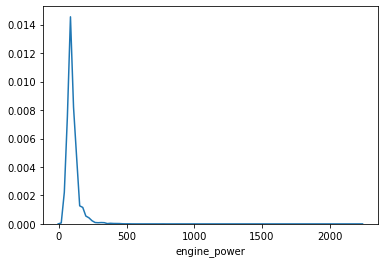

In [12]:
ax = sns.distplot(df['engine_power'], hist=False)

The above plot shows that most of the value for 'engine_power' lies below 250. Also there is outlier in the data that stretches upto 2500 value. It has right skewed distribution.

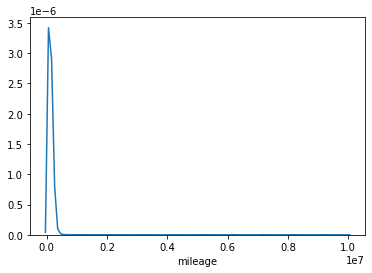

In [14]:
ax = sns.distplot(df['mileage'], hist=False)

It seems from the plot above the mileage are conncentrated within certain value, but it also has outlier in the data. It is right-skewed distribution.

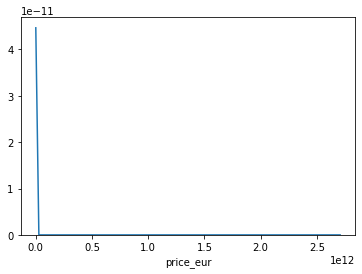

In [5]:
ax = sns.distplot(df['price_eur'], hist=False)

It seems the value for price is very concentrated. It also has outlier problem. Hence, we will log transform data.

In [6]:
df['price_eur'] = np.log(df['price_eur'])

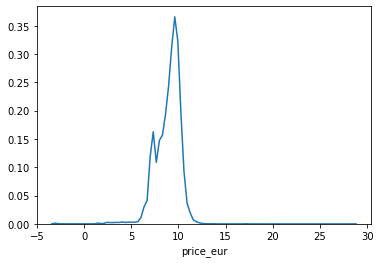

In [7]:
ax = sns.distplot(df['price_eur'], hist=False)

## **Categorical value encoding**

In this section, we will encode column 'maker' using one-hot encoding. One-hot encoding is done only on numerical categorical values. So, first we will use label encoding and then one-hot encoding. For one-hot encoding we will use 'get_dummies' method from 'pandas' library.

In [5]:
from sklearn.preprocessing import LabelEncoder, 

label_encoder = LabelEncoder()
df['maker'] = label_encoder.fit_transform(df['maker'])

In [6]:
df = pd.get_dummies(df, columns=['maker'], prefix = ['maker'])

In [7]:
df.head()

,mileage,manufacture_year,engine_power,door_count,date_created,date_last_seen,price_eur,maker_0,maker_1,maker_2,...,maker_36,maker_37,maker_38,maker_39,maker_40,maker_41,maker_42,maker_43,maker_44,maker_45
0,151000.0,2011.0,103.0,5,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,143476.0,2012.0,81.0,5,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,97676.0,2010.0,85.0,5,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,111970.0,2004.0,47.0,5,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,128886.0,2004.0,47.0,5,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## **Column dropping**

 We, will now drop the columns that are repitative or not required.

In [21]:
df.drop(columns='date_last_seen', inplace=True)

In [22]:
df.drop(columns='date_created', inplace=True)

## **Correlation Heatmap**

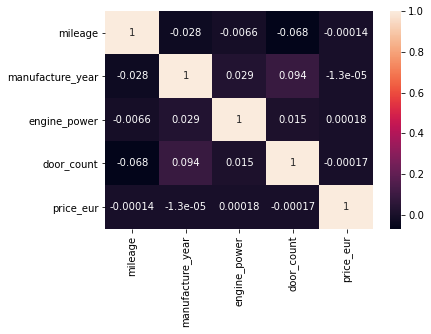

In [23]:
f, ax = plt.subplots()
sns.heatmap(df.corr(), annot = True)
plt.show()